<a href="https://colab.research.google.com/github/alvaroOpereira/imer_phyton/blob/main/imers%C3%A3o_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 1

In [4]:
import pandas as pd

In [6]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [8]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [9]:
df.shape

(133349, 11)

In [10]:
linhas, colunas = df.shape[0], df.shape[1]

In [11]:
print("o número de linhas é:", linhas)
print("o número de colunas é:", colunas)

o número de linhas é: 133349
o número de colunas é: 11


In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [153]:
df["tipo_de_emprego"].value_counts()

,count
tipo_de_emprego,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [71]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [14]:
column_translation = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'tipo_de_emprego',
    'job_title': 'cargo',
    'salary': 'salário',
    'salary_currency': 'moeda_do_salário',
    'salary_in_usd': 'salário_em_usd',
    'employee_residence': 'residência_do_empregado',
    'remote_ratio': 'remoto',
    'company_location': 'localização_da_empresa',
    'company_size': 'tamanho_da_empresa'
}

df.rename(columns=column_translation, inplace=True)

display(df.head())

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [15]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [16]:
category_translation = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(category_translation)

print("Valores únicos na coluna 'senioridade' após tradução:")
print(df['senioridade'].unique())

Valores únicos na coluna 'senioridade' após tradução:
['Sênior' 'Pleno' 'Júnior' 'Executivo']


In [17]:
df["senioridade"].value_counts()

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [18]:
employment_type_translation = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df['tipo_de_emprego'] = df['tipo_de_emprego'].replace(employment_type_translation)

print("Valores únicos na coluna 'tipo_de_emprego' após tradução:")
print(df['tipo_de_emprego'].unique())

Valores únicos na coluna 'tipo_de_emprego' após tradução:
['Tempo Integral' 'Contrato' 'Tempo Parcial' 'Freelancer']


In [19]:
company_size_translation = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_da_empresa'] = df['tamanho_da_empresa'].replace(company_size_translation)

print("Valores únicos na coluna 'tamanho_da_empresa' após tradução:")
print(df['tamanho_da_empresa'].unique())

Valores únicos na coluna 'tamanho_da_empresa' após tradução:
['Médio' 'Grande' 'Pequeno']


In [20]:
df["tamanho_da_empresa"].value_counts()

,count
tamanho_da_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [21]:
remote_translation = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remote_translation)

print("Valores únicos na coluna 'remoto' após tradução:")
print(df['remoto'].unique())

Valores únicos na coluna 'remoto' após tradução:
['Remoto' 'Presencial' 'Híbrido']


In [23]:
df.describe(include="object")

,senioridade,tipo_de_emprego,cargo,moeda_do_salário,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [24]:
df.describe()

,ano,salário,salário_em_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# AULA 2

In [27]:
df.isnull()

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [28]:
df.head()

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [29]:
df.isnull().sum(

)

,0
ano,10
senioridade,0
tipo_de_emprego,0
cargo,0
salário,0
moeda_do_salário,0
salário_em_usd,0
residência_do_empregado,0
remoto,0
localização_da_empresa,0


In [32]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [33]:
df[df.isnull().any(axis=1)]

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [47]:
import numpy as np

#Criação de uma base de testes
df_salarios = pd.DataFrame({
    'nome':["Ana", "Bruno", "Carlos", "Daniele"," Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})
#calcula a média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
#calcula a mediana do salario e substitui os valores nulos
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [60]:
df_temperaturas = pd.DataFrame({
  "dia":["segunda", "terça", "quarta", "quinta", "sexta"],
  "temperatura":[30, np.nan, np.nan, 28, 27]
})
#função para preencher os campos nulos com a valor anterior
df_temperaturas["preenchido_ffill"] = df_temperaturas["temperatura"].ffill()
#função para preencer os campos nulos com o valor que veio depois
df_temperaturas["preenchido_bfill"] = df_temperaturas["temperatura"].bfill()
df_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,27.0,27.0,27.0


In [61]:
df_temperaturas.head()

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,27.0,27.0,27.0


In [63]:
df_cidades = pd.DataFrame({
    'nome':["Ana", "Bruno", "Carlos", "Daniele"," Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades["cidade"].fillna("não informado")

display(df_cidades)

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,não informado
4,Val,Belém,Belém


In [64]:
df_limpo = df.dropna()


In [66]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
tipo_de_emprego,0
cargo,0
salário,0
moeda_do_salário,0
salário_em_usd,0
residência_do_empregado,0
remoto,0
localização_da_empresa,0


In [67]:
df_limpo.head()

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [89]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ano                      133339 non-null  int64 
 1   senioridade              133339 non-null  object
 2   tipo_de_emprego          133339 non-null  object
 3   cargo                    133339 non-null  object
 4   salário                  133339 non-null  int64 
 5   moeda_do_salário         133339 non-null  object
 6   salário_em_usd           133339 non-null  int64 
 7   residência_do_empregado  133339 non-null  object
 8   remoto                   133339 non-null  object
 9   localização_da_empresa   133339 non-null  object
 10  tamanho_da_empresa       133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [69]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [88]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ano                      133339 non-null  int64 
 1   senioridade              133339 non-null  object
 2   tipo_de_emprego          133339 non-null  object
 3   cargo                    133339 non-null  object
 4   salário                  133339 non-null  int64 
 5   moeda_do_salário         133339 non-null  object
 6   salário_em_usd           133339 non-null  int64 
 7   residência_do_empregado  133339 non-null  object
 8   remoto                   133339 non-null  object
 9   localização_da_empresa   133339 non-null  object
 10  tamanho_da_empresa       133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [87]:
df_limpo.head()

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


# AULA 3

In [152]:
df_limpo.head(10)

,ano,senioridade,tipo_de_emprego,cargo,salário,moeda_do_salário,salário_em_usd,residência_do_empregado,remoto,localização_da_empresa,tamanho_da_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
5,2025,Júnior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Médio
6,2025,Sênior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Médio
7,2025,Sênior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Médio
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Médio
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Médio


In [90]:
df_limpo['senioridade'].value_counts()

,count
senioridade,
Sênior,77236
Pleno,40462
Júnior,12441
Executivo,3200


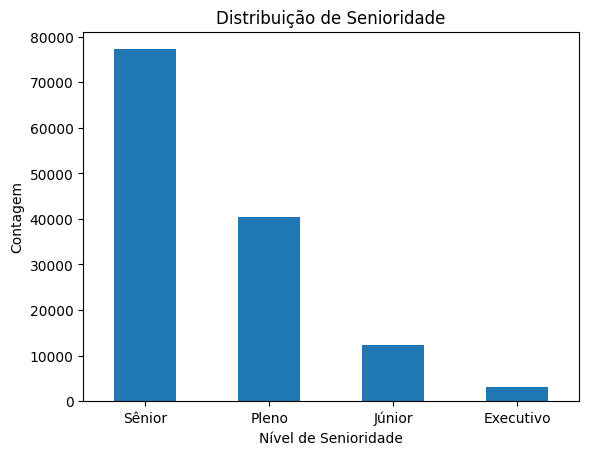

In [98]:
import matplotlib.pyplot as plt

df_limpo['senioridade'].value_counts().plot(kind='bar')
plt.title('Distribuição de Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

In [99]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salário_em_usd'>

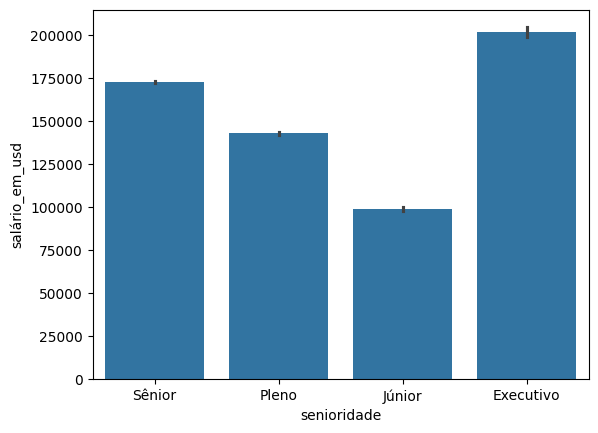

In [102]:
sns.barplot(data = df_limpo, x='senioridade', y='salário_em_usd')

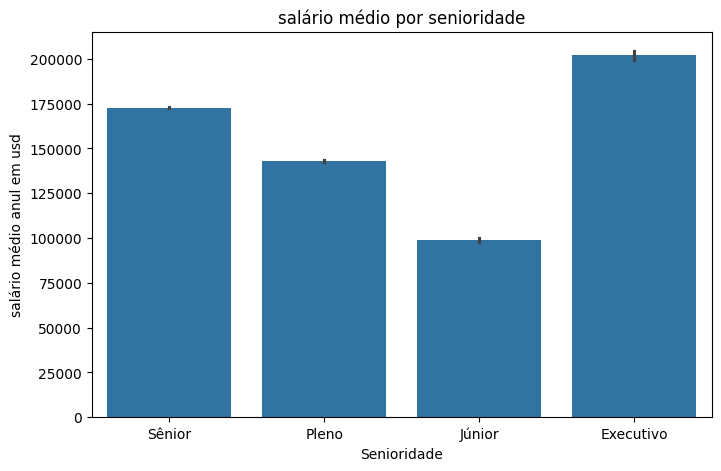

In [103]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='senioridade', y='salário_em_usd')
plt.title("salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("salário médio anul em usd")
plt.show()


In [114]:
df_limpo.groupby('senioridade')['salário_em_usd'].mean().sort_values(ascending=False)

,salário_em_usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [115]:
ordem = df_limpo.groupby('senioridade')['salário_em_usd'].mean().sort_values(ascending=False).index

In [116]:
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

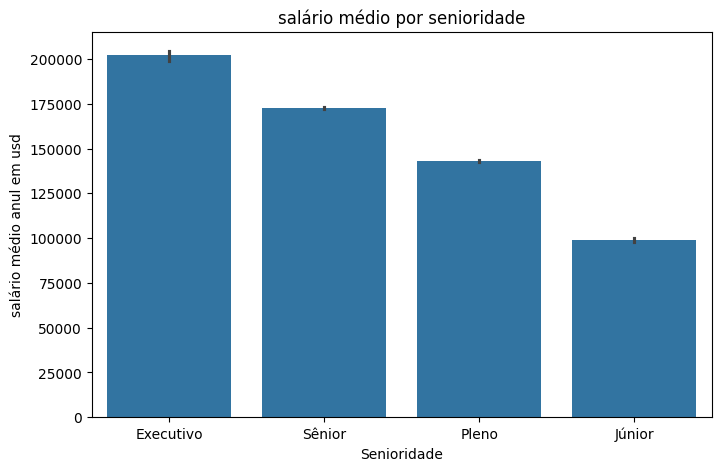

In [119]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x='senioridade', y='salário_em_usd', order=ordem),
plt.title("salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("salário médio anul em usd")
plt.show()

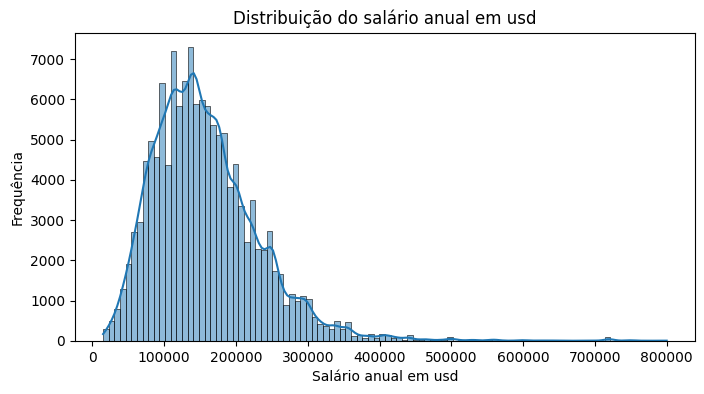

In [126]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['salário_em_usd'], bins = 100, kde=True)
plt.title("Distribuição do salário anual em usd")
plt.xlabel("Salário anual em usd")
plt.ylabel("Frequência")
plt.show()


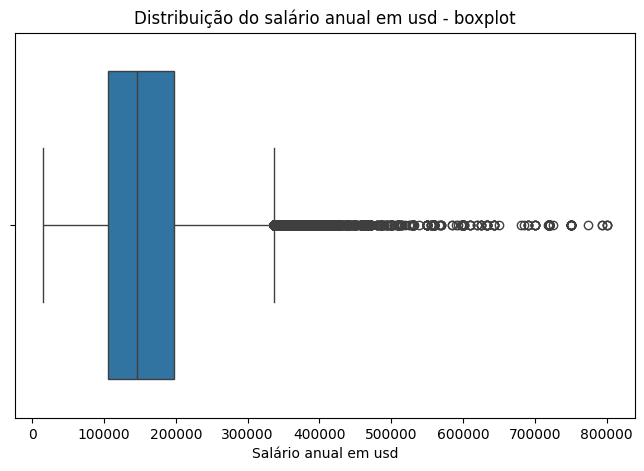

In [138]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['salário_em_usd'])
plt.title("Distribuição do salário anual em usd - boxplot")
plt.xlabel("Salário anual em usd")
plt.show()


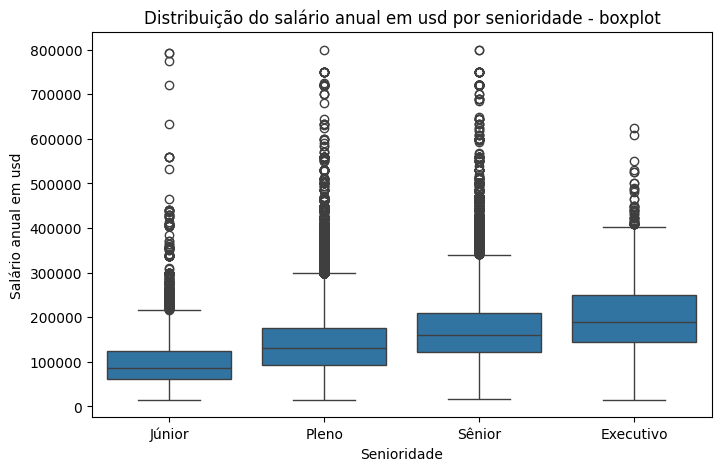

In [140]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salário_em_usd', data = df_limpo, order = ordem_senioridade)
plt.title("Distribuição do salário anual em usd por senioridade - boxplot")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual em usd")
plt.show()

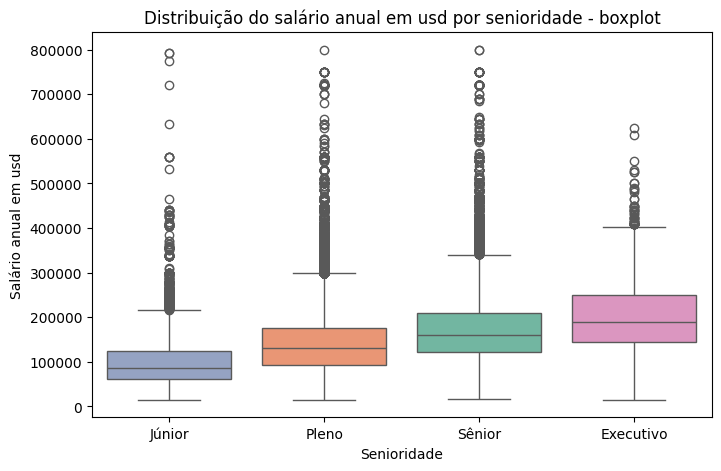

In [142]:
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salário_em_usd', data = df_limpo,
            order = ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Distribuição do salário anual em usd por senioridade - boxplot")
plt.xlabel("Senioridade")
plt.ylabel("Salário anual em usd")
plt.show()

In [143]:
import plotly.express as px

In [144]:
senioridade_media_salario = df_limpo.groupby('senioridade')['salário_em_usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario, x='senioridade', y='salário_em_usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Senioridade', 'salário_em_usd': 'Média Salarial Anual em USD'})

fig.show()

In [148]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do tipo de trabalho',
             )

fig.show()

In [150]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do tipo de trabalho',
             hole=0.5
             )

fig.show()

In [151]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção do tipo de trabalho',
             )
fig.update_traces(textinfo='percent+label')
fig.show()

# DESAFIO: CRIAR UM GRÁFICO DINAMICO USANDO PLOTLY DO SALARIO DOS CIENTISTAS DE DADOS POR PAÍS

In [157]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist'].copy()

fig = px.box(df_ds, x='localização_da_empresa', y='salário_em_usd',
             title='Distribuição do Salário de Data Scientists por Localização da Empresa',
             labels={'localização_da_empresa': "Localização da Empresa", 'salário_em_usd': "Salário Anual em USD"})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [163]:
avg_salary_ds_location

,localização_da_empresa,salário_em_usd
0,AD,50745.000000
1,AR,37500.000000
2,AT,50359.101695
3,AU,112190.000000
4,BE,66790.750000
5,BG,152500.000000
6,BR,71093.000000
7,CA,140597.312977
8,CH,152256.666667
9,CL,69346.000000


In [162]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist'].copy()

avg_salary_ds_location = df_ds.groupby('localização_da_empresa')['salário_em_usd'].mean().reset_index()

fig = px.bar(avg_salary_ds_location, x='localização_da_empresa', y='salário_em_usd',
             title='Média Salarial de Data Scientists por Localização da Empresa',
             labels={'localização_da_empresa': "Localização da Empresa", 'salário_em_usd': "Média Salarial Anual em USD"})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [168]:
#mesma função da anterior mas invertendo a ordenação usando outra função(.sort_values) ou invés de (fig.update_layout(xaxis={'categoryorder':'total x'})
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist'].copy()

avg_salary_ds_location = df_ds.groupby('localização_da_empresa')['salário_em_usd'].mean().sort_values(ascending=True).reset_index()

fig = px.bar(avg_salary_ds_location, x='localização_da_empresa', y='salário_em_usd',
             title='Média Salarial de Data Scientists por Localização da Empresa',
             labels={'localização_da_empresa': "Localização da Empresa", 'salário_em_usd': "Média Salarial Anual em USD"})

fig.show()